# Luento 3 (4.4.2026): Selittävä analytiikka (osa 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
# Seaborn kirjastossa on muutamia aineistoja
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# tuodaan aineisto
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [7]:
# suomennetaan origin-sarakkeen arvot
df = df.replace({"usa": "USA", "japan": "Japani", "europe": "Eurooppa"})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino


In [9]:
df.shape

(398, 9)

## Ristiintaulukointi

In [11]:
# yksinkertainen ristiintaulukointi
df1 = pd.crosstab(df["cylinders"], df["origin"])
df1

origin,Eurooppa,Japani,USA
cylinders,,,
3,0,4,0
4,63,69,72
5,3,0,0
6,4,6,74
8,0,0,103


In [21]:
# sama ristiintaulukointi sarakeprosenteilla
df2 = pd.crosstab(df["cylinders"], df["origin"], normalize="columns")*100

# n-arvot
n_USA = df1["USA"].sum()
n_Eurooppa = df1["Eurooppa"].sum()
n_Japani = df1["Japani"].sum()

# sarakeotsikot
df2.columns = [f"Eurooppa, n={n_Eurooppa}", f"Japani, n={n_Japani}", f"USA, n={n_USA}"]

# muutetaaan otsikkoa
df2.index.name = "sylinterien lkm"

df2.style.format("{:.1f} %")

,"Eurooppa, n=70","Japani, n=79","USA, n=249"
sylinterien lkm,,,
3,0.0 %,5.1 %,0.0 %
4,90.0 %,87.3 %,28.9 %
5,4.3 %,0.0 %,0.0 %
6,5.7 %,7.6 %,29.7 %
8,0.0 %,0.0 %,41.4 %


In [30]:
# sama riviprosentein
df3 = pd.crosstab(df["cylinders"], df["origin"], normalize="index")*100

# n-arvot
n_3 = df1.loc[3, :].sum()
n_4 = df1.loc[4, :].sum()
n_5 = df1.loc[5, :].sum()
n_6 = df1.loc[6, :].sum()
n_8 = df1.loc[8, :].sum()

#n-arvot indexiin
df3.index = [f"3, n={n_3}", f"4, n={n_4}", f"5, n={n_5}", f"6, n={n_6}", f"8, n={n_8}"]

# poistetaan "origin"
df3.columns.name = None

df3.style.format("{:.1f} %")

,Eurooppa,Japani,USA
"3, n=4",0.0 %,100.0 %,0.0 %
"4, n=204",30.9 %,33.8 %,35.3 %
"5, n=3",100.0 %,0.0 %,0.0 %
"6, n=84",4.8 %,7.1 %,88.1 %
"8, n=103",0.0 %,0.0 %,100.0 %


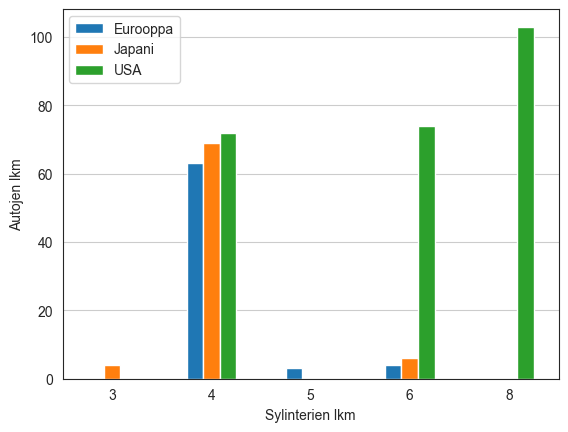

In [36]:
# df1 pylväskaaviona
df1.plot(kind="bar", rot=0)

# y-akselin otsikko
plt.ylabel("Autojen lkm")

# x-akselin otsikko
plt.xlabel("Sylinterien lkm")

# viivoitus
plt.grid(axis="y")

# poistetaan selitelaatikon otsikko
plt.legend(title=None)

<Axes: xlabel='origin'>

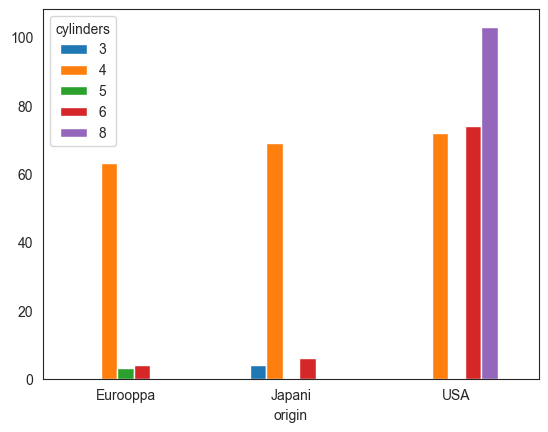

In [37]:
# HUOM! Jos haluaisi ryhmittelyn toisinpäin, niin silloin origin-muuttujan tulisi olla riveillä
pd.crosstab(df["origin"], df["cylinders"]).plot(kind="bar", rot=0)

Muodostetaan pinottu palkkikaavio ristiintaulukoinnista, jossa on sarakeprosentteja.

In [38]:
# transponoidaan df2
df4 = df2.T
df4

sylinterien lkm,3,4,5,6,8
"Eurooppa, n=70",0.000000,90.000000,4.285714,5.714286,0.000000
"Japani, n=79",5.063291,87.341772,0.000000,7.594937,0.000000
"USA, n=249",0.000000,28.915663,0.000000,29.718876,41.365462


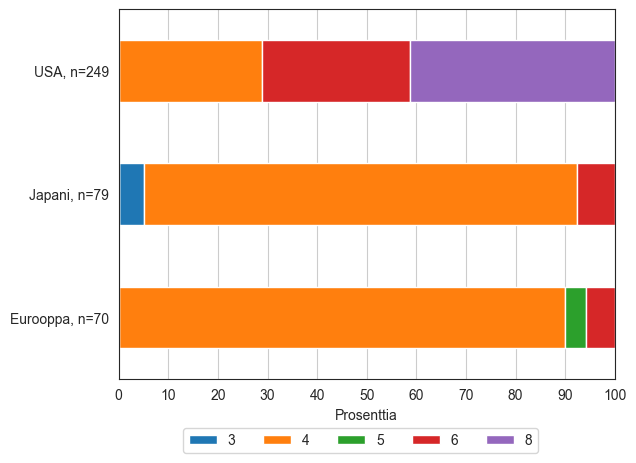

In [51]:
# muodostetaan pinottu palkkikaavio
df4.plot(kind="barh", stacked=True)

# x-akselin otsikko
plt.xlabel("Prosenttia")

# x-akseli
plt.xlim(0, 100)

# viivoitus
plt.grid(axis="x")

# x-akselin numerointi
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# muokataan selitelaatikkoa
plt.legend(ncols=5, loc=(0.13, -0.2))

plt.show()

Samoin kuin frekvenssitauluissa, jos halutaan ristiintaulukoida määrällinen muuttua, se pitää luultavasti luokitella.

In [53]:
df["mpg"].max()

np.float64(46.6)

In [56]:
# luokiteltu versio mpg-muuttujasta
df["mpg_class"] = pd.cut(df["mpg"], bins=[0,10,20,30,40,50], right=False)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_class
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu,"[10, 20)"
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320,"[10, 20)"
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite,"[10, 20)"
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst,"[10, 20)"
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino,"[10, 20)"


In [57]:
# nyt voidaan ristiintaulukoida origin a mpg_class
pd.crosstab(df["mpg_class"], df["origin"])

origin,Eurooppa,Japani,USA
mpg_class,,,
"[0, 10)",0,0,1
"[10, 20)",6,3,141
"[20, 30)",42,29,84
"[30, 40)",16,44,23
"[40, 50)",6,3,0


## Tunnuslukujen vertailu ryhmien välillä

### Tunnuslukuja ryhmittäin groupby-funktiolla

In [58]:
# kulutus alkuperän mukaan
df.groupby("origin")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Eurooppa,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
Japani,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
USA,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [60]:
# teho sylinteriluvun mukaan
df.groupby("cylinders")["horsepower"].describe().style.format(precision=1)

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,99.2,8.3,90.0,95.2,98.5,102.5,110.0
4,199.0,78.3,14.5,46.0,68.0,78.0,88.0,115.0
5,3.0,82.3,18.6,67.0,72.0,77.0,90.0,103.0
6,83.0,101.5,14.3,72.0,92.5,100.0,110.0,165.0
8,103.0,158.3,28.5,90.0,140.0,150.0,175.0,230.0


In [61]:
# kiihtyvyys alkuperän mukaan
df.groupby("origin")["acceleration"].mean()

origin
Eurooppa    16.787143
Japani      16.172152
USA         15.033735
Name: acceleration, dtype: float64

In [62]:
# ryhmitteleviä muuttujia voi olla useampiakin
df.groupby(["origin", "cylinders"])["weight"].describe()

count         mean         std     min      25%     50%  \
origin   cylinders                                                            
Eurooppa 4           63.0  2330.015873  409.036298  1825.0  1995.00  2219.0   
         5            3.0  3103.333333  374.343870  2830.0  2890.00  2950.0   
         6            4.0  3382.500000  316.478014  3140.0  3155.00  3285.0   
Japani   3            4.0  2398.500000  247.566153  2124.0  2278.50  2375.0   
         4           69.0  2153.492754  264.306786  1613.0  1975.00  2130.0   
         6            6.0  2882.000000   56.267220  2807.0  2836.25  2905.0   
USA      4           72.0  2437.166667  301.490803  1800.0  2164.00  2408.0   
         6           74.0  3213.905405  332.995379  2472.0  2969.75  3239.0   
         8          103.0  4114.718447  448.833159  3086.0  3799.00  4140.0   

                        75%     max  
origin   cylinders                   
Eurooppa 4          2591.00  3270.0  
         5          3240.00  3530.0  
         6          3512.50  3820.0  
Japani   3          2495.00  2720.0  
         4          2300.00  2711.0  
         6          2925.00  2930.0  
USA      4          2670.00  3035.0  
         6          3437.25  3907.0  
         8          4403.50  5140.0

### Laatikkojanakuvio

Text(0.5, 0, 'Alkuperä')

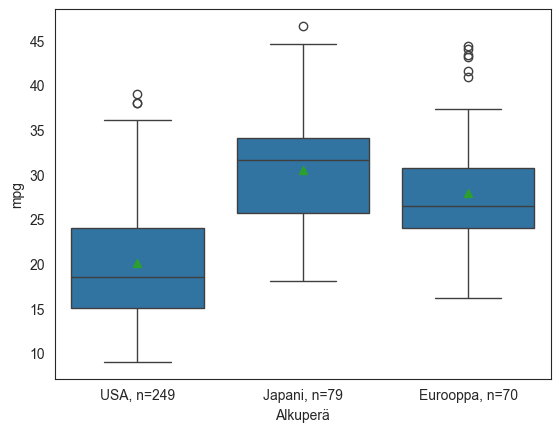

In [70]:
# vertaillaan eri alkuperää olevien autojen kulutusta
sns.boxplot(data=df, y="mpg", x="origin", showmeans=True)

# n-arvot
n_Eurooppa_mpg = df[df["origin"]=="Eurooppa"]["mpg"].count()
n_Japani_mpg = df[df["origin"]=="Japani"]["mpg"].count()
n_USA_mpg = df[df["origin"]=="USA"]["mpg"].count()

# x-akseli
alueet = [f"USA, n={n_USA_mpg}", f"Japani, n={n_Japani_mpg}", f"Eurooppa, n={n_Eurooppa_mpg}"]
plt.xticks(ticks=[0, 1, 2], labels=alueet)

# x-akselin otsikko
plt.xlabel("Alkuperä")

<Axes: xlabel='origin', ylabel='mpg'>

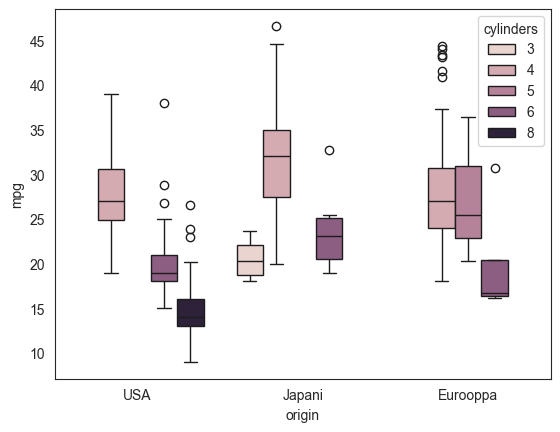

In [72]:
# laatikkojanakuviossa voi käyttää myös hue-argumenttia
sns.boxplot(data=df, y="mpg", x="origin", hue="cylinders")

## Lyhyt tutustuminen Pivot-taulukoihin

pivot_table-metodilla on neljä erityisen tärkeää parametria:
* index
* columns
* values
* aggfunc

In [77]:
# tarkastellaan keskimääräistä kulutusta, kun kategorisina muuttujina on alkuperä ja sylinterilukema
pivot1 = df.pivot_table(index="origin", columns="cylinders", values="mpg", aggfunc="mean")
pivot1.style.format(precision=1, na_rep="-")

cylinders,3,4,5,6,8
origin,,,,,
Eurooppa,-,28.4,27.4,20.1,-
Japani,20.6,31.6,-,23.9,-
USA,-,27.8,-,19.7,15.0


In [79]:
# tarkastellaan suurinta tehoa, kun kategorisina muuttujina ovat alkuperä ja sylinterilukema
df.pivot_table(index="origin", columns="cylinders", values="horsepower", aggfunc="max").style.format(precision=1, na_rep="-")

cylinders,3,4,5,6,8
origin,,,,,
Eurooppa,-,115.0,103.0,133.0,-
Japani,110.0,100.0,-,132.0,-
USA,-,105.0,-,165.0,230.0


In [87]:
# tehdään pivot-taulukko, jossa on useampi aggregointifunktio
df.pivot_table(index="origin", values="mpg", aggfunc=["min", "median", "mean", "max"])\
.style.format(precision=1)\
.highlight_max(color="green", axis=0)\
.highlight_min(color="red", axis=0)

,min,median,mean,max
,mpg,mpg,mpg,mpg
origin,,,,
Eurooppa,16.2,26.5,27.9,44.3
Japani,18.0,31.6,30.5,46.6
USA,9.0,18.5,20.1,39.0
